# Week4 事前課題１
## アヤメの分析

### 【課題1】練習のために特徴量とカテゴリを選択
***

In [22]:
#データセットをデータフレームに格納

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()

data = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
target = pd.DataFrame(iris.target, columns=['Species'])
df_0 = pd.concat([data, target], axis=1)

df_0.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
#ターゲット：virgicolorとvirginica、特徴量：sepal_lengthとpetal_lengthを抜き出す

df = df_0.query("not Species == 0").iloc[:,[0,2,4]]
df = df.reset_index(drop=True) 
df.head()

,sepal_length,petal_length,Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


### 【問題2】データの分析
---

[]

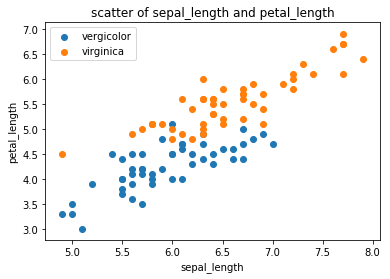

In [28]:
#散布図
plt.title("scatter of sepal_length and petal_length")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.scatter(df.query("Species == 1")["sepal_length"], df.query("Species == 1")["petal_length"], label="vergicolor")
plt.scatter(df.query("Species == 2")["sepal_length"], df.query("Species == 2")["petal_length"], label="virginica")
plt.legend()
plt.plot()


[]

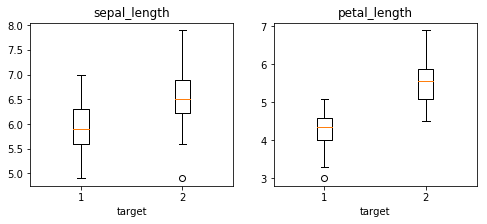

In [37]:
#箱ひげ図
plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
plt.title("sepal_length")
plt.xlabel("target")
plt.boxplot([df.query("Species == 1")["sepal_length"],df.query("Species == 2")["sepal_length"]])

plt.subplot(1,2,2)
plt.title("petal_length")
plt.xlabel("target")
plt.boxplot([df.query("Species == 1")["petal_length"],df.query("Species == 2")["petal_length"]])
plt.plot()

[]

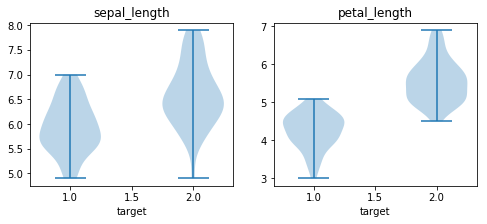

In [39]:
#バイオリン図
plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
plt.title("sepal_length")
plt.xlabel("target")
plt.violinplot([df.query("Species == 1")["sepal_length"],df.query("Species == 2")["sepal_length"]])

plt.subplot(1,2,2)
plt.title("petal_length")
plt.xlabel("target")
plt.violinplot([df.query("Species == 1")["petal_length"],df.query("Species == 2")["petal_length"]])
plt.plot()

### 【問題3】前処理・訓練用データと検証用データの分割
---

In [90]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,[0,1]].values
y = df["Species"].values

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=0,) #シードも設定しておく

print("X_train", np.shape(X_train))
print("X_test", np.shape(X_test))
print("Y_train", np.shape(y_train))
print("Y_test", np.shape(y_test))

X_train (75, 2)
X_test (25, 2)
Y_train (75,)
Y_test (25,)


### 【問題4】前処理・標準化
---

In [60]:
from sklearn.preprocessing import StandardScaler

#X_trainのパラメータを計算
sc = StandardScaler()
sc.fit(X_train)
print("相対的なスケーリング", sc.scale_)
print("平均値", sc.mean_)
print("分散値", sc.var_)
print("サンプル数", sc.n_samples_seen_)

相対的なスケーリング [0.66354469 0.82688169]
平均値 [6.27466667 4.9       ]
分散値 [0.44029156 0.68373333]
サンプル数 75


In [66]:
#X_trainのパラメータをもとにデータ計算

X_train_sc = sc.transform(X_train)

In [67]:
X_test_sc = sc.transform(X_test)  #X_trainのパラメータが適用されている？？

### 【問題5】学習と推定
---

In [83]:
#k近傍法
from sklearn.neighbors import KNeighborsClassifier

knn = {}
y_pred = {}

for i in range (1, 10, 2):
    knn[str(i)] = KNeighborsClassifier(n_neighbors=i)  #インスタンス生成
    knn[str(i)].fit(X_train_sc, y_train)                            #モデル作成
    y_pred[str(i)] = knn[str(i)].predict(X_test_sc)         #予測実行

print("1-nn", y_pred["1"])
print("3-nn", y_pred["3"])
print("5-nn", y_pred["5"])
print("9-nn", y_pred["9"])

1-nn [1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
3-nn [1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
5-nn [1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1]
9-nn [1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


### 【問題6】評価
---

In [114]:
from sklearn import metrics

#Accuracy（正解率）
for i in knn:
    print(i,"-nn：", metrics.accuracy_score(y_test, y_pred[i]))
    
knn_list = [metrics.accuracy_score(y_test, y_pred["5"])]

1 -nn： 0.84
3 -nn： 0.92
5 -nn： 0.88
7 -nn： 0.92
9 -nn： 0.92


In [115]:
#Precision（適合率）
for i in knn:
    print(i,"-nn：", metrics.precision_score(y_test, y_pred[i]))

knn_list.append(metrics.precision_score(y_test, y_pred["5"]))

1 -nn： 0.9090909090909091
3 -nn： 1.0
5 -nn： 1.0
7 -nn： 1.0
9 -nn： 1.0


In [116]:
#Recall（再現率）
for i in knn:
    print(i,"-nn：", metrics.recall_score(y_test, y_pred[i]))

knn_list.append(metrics.recall_score(y_test, y_pred["5"]))

1 -nn： 0.7692307692307693
3 -nn： 0.8461538461538461
5 -nn： 0.7692307692307693
7 -nn： 0.8461538461538461
9 -nn： 0.8461538461538461


In [117]:
#F値
for i in knn:
    print(i,"-nn：", metrics.f1_score(y_test, y_pred[i]))

knn_list.append(metrics.f1_score(y_test, y_pred["5"]))

1 -nn： 0.8333333333333333
3 -nn： 0.9166666666666666
5 -nn： 0.8695652173913044
7 -nn： 0.9166666666666666
9 -nn： 0.9166666666666666


In [89]:
#混同行列（confusion matrix）
for i in knn:
    print(i,"-nn：", metrics.confusion_matrix(y_test, y_pred[i]))

1 -nn： [[10  3]
 [ 1 11]]
3 -nn： [[11  2]
 [ 0 12]]
5 -nn： [[10  3]
 [ 0 12]]
7 -nn： [[11  2]
 [ 0 12]]
9 -nn： [[11  2]
 [ 0 12]]


#### 各指標について

二値分類（2クラス分類）においては実際のクラスと予測したクラスの組み合わせによって、結果を以下の4種類に分けることができる。

 - 真陽性（TP: True Positive）: 実際のクラスが陽性で予測も陽性（正解）
 - 真陰性（TN: True Negative）: 実際のクラスが陰性で予測も陰性（正解）
 - 偽陽性（FP: False Positive）: 実際のクラスは陰性で予測が陽性（不正解）
 - 偽陰性（FN: False Negative）: 実際のクラスは陽性で予測が陰性（不正解）

これを行列にしたものが混同行列。

 - [[TN, FP][FN, TP]]

４種類の指標値は、混同行列の値をもとに算出されている。

 - 正解率（accuracy）は、すべてのサンプルのうち正解したサンプルの割合。
 
 $$
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
 $$

- 適合率（precision）は、陽性と予測されたサンプルのうち正解したサンプルの割合。

$$
 precision = \frac{TP}{TP +  FP}
 $$

- 再現率（recall）は実際に陽性のサンプルのうち正解したサンプルの割合。

$$
 recall = \frac{TP}{TP + FN}
$$

- F1値（F1-measure）は適合率と再現率の調和平均。

$$
 F1 = \frac{2 * TP}{2 * TP + FP + FN}
$$

### 【問題7】可視化
---

In [91]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

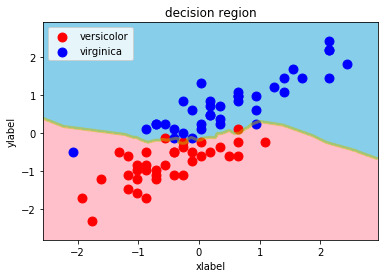

In [97]:
#nn-5
decision_region(X_train_sc, y_train, knn["5"])

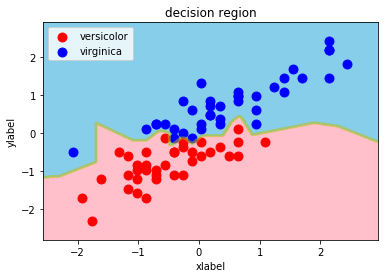

In [98]:
#nn-1
decision_region(X_train_sc, y_train, knn["1"])

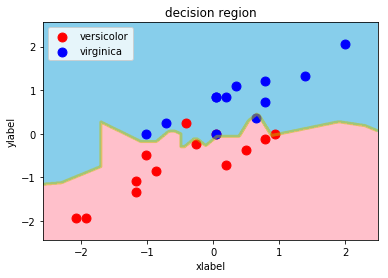

In [99]:
#検証用データ
decision_region(X_test_sc, y_test, knn["1"])

### 【問題8】他の手法の学習
---


In [106]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_sc, y_train)  #訓練

Ir_pr = lr.predict(X_test_sc)   #予測
print(Ir_pr)

[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


In [105]:
print (lr.score(X_test_sc, y_test))

0.92


In [108]:
#混合行列
metrics.confusion_matrix(y_test, Ir_pr)

array([[11,  2],
       [ 0, 12]])

In [118]:
#各指標値のリスト格納
Ir_list = [metrics.accuracy_score(y_test, Ir_pr),
           metrics.precision_score(y_test, Ir_pr), 
           metrics.recall_score(y_test, Ir_pr),
           metrics.f1_score(y_test, Ir_pr) ]
Ir_list

[0.92, 1.0, 0.8461538461538461, 0.9166666666666666]

In [119]:
#SVM
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_sc, y_train)  #訓練
svc_pr = svc.predict(X_test_sc)   #予測
print(svc_pr)

[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


In [120]:
print (svc.score(X_test_sc, y_test))

0.92


In [121]:
metrics.confusion_matrix(y_test, svc_pr)

array([[11,  2],
       [ 0, 12]])

In [128]:
#各指標値のリスト格納
svc_list = [metrics.accuracy_score(y_test, svc_pr),
           metrics.precision_score(y_test, svc_pr), 
           metrics.recall_score(y_test, svc_pr),
           metrics.f1_score(y_test, svc_pr) ]
svc_list

[0.92, 1.0, 0.8461538461538461, 0.9166666666666666]

In [129]:
#決定木
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_sc, y_train)
clf_pr = clf.predict(X_test_sc)
print(clf_pr)

[1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 1 2 1]


In [130]:
print(clf.score(X_test_sc, y_test))

0.88


In [131]:
metrics.confusion_matrix(y_test, clf_pr)

array([[10,  3],
       [ 0, 12]])

In [127]:
clf_list = [metrics.accuracy_score(y_test, clf_pr),
           metrics.precision_score(y_test, clf_pr), 
           metrics.recall_score(y_test, clf_pr),
           metrics.f1_score(y_test, clf_pr) ]
clf_list

[0.88, 1.0, 0.7692307692307693, 0.8695652173913044]

In [132]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

Rclf = RandomForestClassifier(random_state=0)
Rclf.fit(X_train_sc, y_train)
Rclf_pr = Rclf.predict(X_test_sc)
print(Rclf_pr)


[2 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [133]:
print(Rclf.score(X_test_sc, y_test))

0.88


In [134]:
metrics.confusion_matrix(y_test, Rclf_pr)

array([[10,  3],
       [ 0, 12]])

In [135]:
Rclf_list = [metrics.accuracy_score(y_test, Rclf_pr),
           metrics.precision_score(y_test, Rclf_pr), 
           metrics.recall_score(y_test, Rclf_pr),
           metrics.f1_score(y_test, Rclf_pr) ]
Rclf_list

[0.88, 1.0, 0.7692307692307693, 0.8695652173913044]

In [136]:
score_dict = {"knn":knn_list, "lr": Ir_list, "svc": svc_list, "clf": clf_list, "Rclf": Rclf_list} 

In [139]:
#各指標の一覧
pd.DataFrame(score_dict, index=["accuracy", "precision", "recall", "F1"])

,knn,lr,svc,clf,Rclf
accuracy,0.880000,0.920000,0.920000,0.880000,0.880000
precision,1.000000,1.000000,1.000000,1.000000,1.000000
recall,0.769231,0.846154,0.846154,0.769231,0.769231
F1,0.869565,0.916667,0.916667,0.869565,0.869565


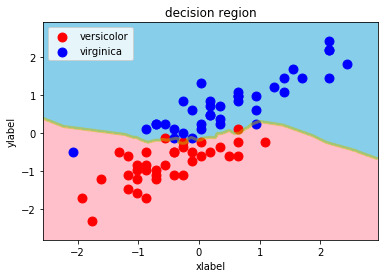

In [140]:
#領域の比較
#nn-5
decision_region(X_train_sc, y_train, knn["5"])

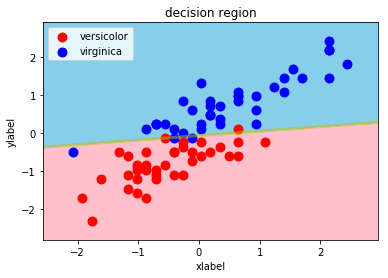

In [141]:
#ロジスティック回帰
decision_region(X_train_sc, y_train, lr )

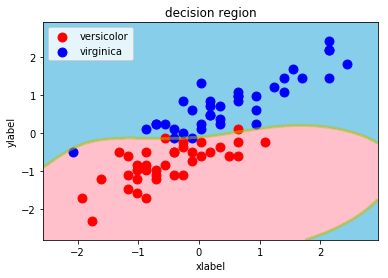

In [142]:
#SVM
decision_region(X_train_sc, y_train, svc)

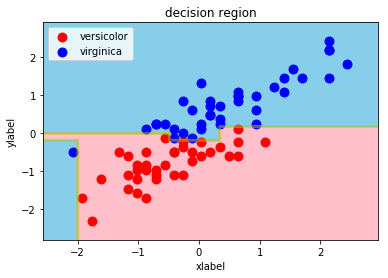

In [143]:
#決定木
decision_region(X_train_sc, y_train, clf)

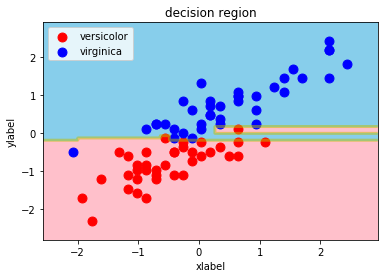

In [144]:
#ランダムフォレスト
decision_region(X_train_sc, y_train, Rclf)

#### 【考察】

＜指標について＞

 - 正解率、再現率、F1はロジスティック回帰およびSVMの値が良い
 - 適合率はどの手法でも変わりない
 
 
 ＜決定領域について＞
 
 - K近傍法は曲線で領域を区切っている
 - ロジスティック回帰は直線で領域を区切っている
 - SVMは曲線で領域を区切っており、K近傍法よりもフィットが良いように見える
 - 決定木は縦横の直線で領域を区切っている
 - ランダムフォレストは横線を主体とした区切り方となっている